In [17]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

訓練用のランダムデータを作成

In [18]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

# データの結合
inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000, 2)


ターゲットの作成

In [19]:
# 実際のデータにはノイズが含まれるため、ノイズを加える
targets = 2 * xs - 3 * zs + 5 + np.random.uniform(-1, 1, (observations, 1))

print(targets.shape)

(1000, 1)


訓練データのプロット (線形の関係)

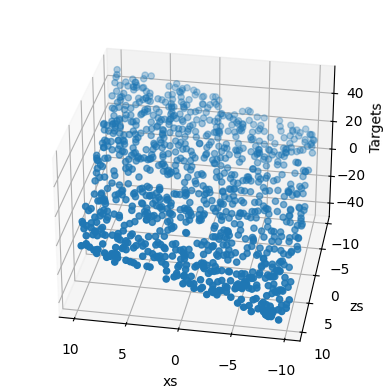

In [21]:
targets = targets.reshape(
    observations,
)

fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")

ax.scatter(xs, zs, targets)

ax.set_xlabel("xs")
ax.set_ylabel("zs")
ax.set_zlabel("Targets")

ax.view_init(azim=100)

plt.show()

targets = targets.reshape(observations, 1)

変数の初期値を設定

In [22]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2, 1))
biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(biases)

[[-0.02105447]
 [-0.09932194]]
[-0.06066609]


学習率の設定

In [25]:
learning_rate = 0.02

モデルの訓練

In [27]:
for i in range(200):
    # y = xw + b
    outputs = np.dot(inputs, weights) + biases
    # deltas = y - t
    deltas = outputs - targets

    # L2-norm 損失関数
    loss = np.sum(deltas**2) / 2 / observations

    print(loss)

    #
    deltas_scaled = deltas / observations

    # w = w - alpha * dL/dw
    # Tは転置行列
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.395070004847194
0.38614255272216647
0.3775680521601462
0.36933254903356383
0.3614226408986962
0.35382545518455377
0.34652862824408104
0.3395202852335774
0.3327890207875967
0.3263238804578758
0.3201143428860852
0.31415030268138394
0.3084220539749304
0.3029202746245625
0.2976360110439622
0.2925606636316026
0.28768597277577396
0.28300400541290244
0.27850714211729793
0.2741880647013138
0.27003974430573985
0.26605542996104925
0.26222863760088216
0.2585531395098872
0.2550229541887487
0.2516323366199045
0.24837576891811355
0.24524795135065994
0.24224379371257612
0.23935840704285336
0.23658709566815303
0.23392534956107675
0.23136883700055655
0.2289133975224169
0.2265550351486453
0.22428991188434236
0.2221143414717763
0.22002478339137324
0.2180178370998821
0.2160902364963359
0.21423884460680437
0.2124606484792884
0.21075275428044732
0.20911238258617879
0.20753686385838901
0.20602363410059146
0.2045702306852625
0.20317428834616616
0.20183353532912415
0.2005457896949665
0.19930895576864738
0.19

重みとバイアスの確認 (繰り返し数が少ないと少し変な値になる)

In [28]:
print(weights, biases)

[[ 2.00188292]
 [-2.99720522]] [4.96350435]


最終的な出力とターゲットのプロット

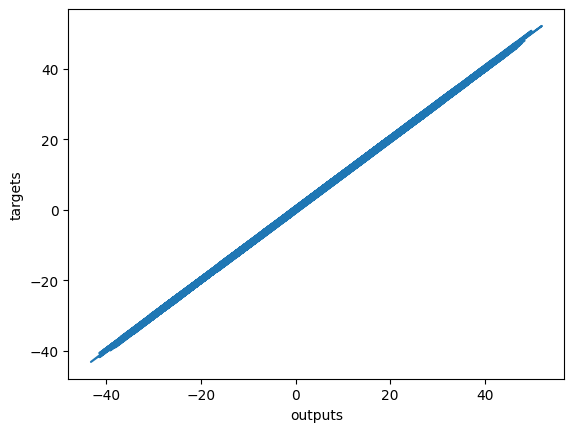

In [29]:
plt.plot(outputs, targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()
